# Some considerations on the star of slots (sos)

The sos allows to sistematically layout a multi-phase balanced and symmetrical winding.

In koil we can visualize the sos of a winding as follows:

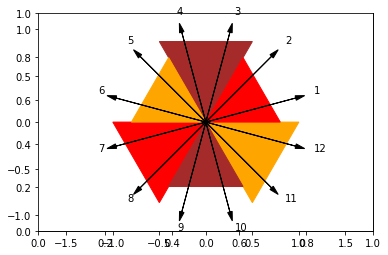

In [15]:
# Let define some data...
m = 3;  # Number of phases
Q = 12; # Number of slots
p = 1;  # Number of pole pairs

from dolomites import koil

sos = koil.star_of_slot(m, Q, p);
sos.create_sectors();
sos.plot()



we can then populate the winding on the basis of the sos

In [16]:
# we create an ampty winding
w = koil.m_phase_winding() 

# we ask the sos to populate the winding
sos.populate_winding(w);

# we can then 
w.windings[0].get_kw()

0.9659258262890682

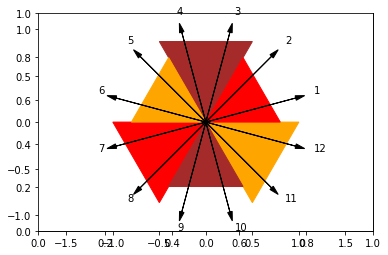

0.9659258262890682

In [17]:
# when we compute a winding, the sos is automatically generated and can be
# retrieved in this way:

# Let define some data...
m = 3;  # Number of phases
Q = 12; # Number of slots
p = 1;  # Number of pole pairs

w = koil.m_phase_winding()
w.compute_winding(m,Q,p,single_layer=False)
w.star.plot()
w.windings[0].get_kw()

In [18]:
# we can inspect coils and slot matrix
print(w.windings[0].coils)
print(w.windings[1].coils)
print(w.windings[2].coils)

print(w.windings[0].get_slot_matrix())
print(w.windings[1].get_slot_matrix())
print(w.windings[2].get_slot_matrix())



[coil (3, 9, 1), coil (4, 10, 1), coil (9, 3, -1), coil (10, 4, -1)]
[coil (7, 1, 1), coil (8, 2, 1), coil (1, 7, -1), coil (2, 8, -1)]
[coil (11, 5, 1), coil (12, 6, 1), coil (5, 11, -1), coil (6, 12, -1)]
[ 0.  0.  1.  1.  0.  0.  0.  0. -1. -1.  0.  0.]
[-1. -1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  1.  1.]


## rotation of the sos, shoft of the slot matrix

koil try to layout the winding so that the \$\alpha\$-axis is horizontally placed.
Nevertheless it is always possible to tune the sos so as to achieve the desired results
(or fix some issue in specific situations).

An example is as follows:

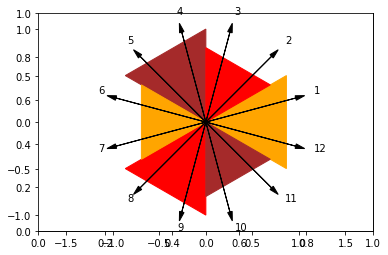

[coil (4, 10, 1), coil (5, 11, 1), coil (10, 4, -1), coil (11, 5, -1)]
[coil (8, 2, 1), coil (9, 3, 1), coil (2, 8, -1), coil (3, 9, -1)]
[coil (6, 12, -1), coil (7, 1, -1)]
[ 0.  0.  0.  1.  1.  0.  0.  0.  0. -1. -1.  0.]
[ 0. -1. -1.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
[ 1.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  1.]
0.9659258262890684
0.9659258262890683
0.9659258262890682


In [19]:
# Let define some data...
m = 3;  # Number of phases
Q = 12; # Number of slots
p = 1;  # Number of pole pairs

from dolomites import koil
import math

# with the offset parameter we can rotate the sectors
# of a specific value in order to tune our winding
sos = koil.star_of_slot(m, Q, p);
sos.create_sectors(offset = 2*math.pi/Q*p);
sos.plot()

# we proceed then as usual:

# we create an ampty winding
w = koil.m_phase_winding() 
# we ask the sos to populate the winding
sos.populate_winding(w);

# we can inspect coils and slot matrix
print(w.windings[0].coils)
print(w.windings[1].coils)
print(w.windings[2].coils)

print(w.windings[0].get_slot_matrix())
print(w.windings[1].get_slot_matrix())
print(w.windings[2].get_slot_matrix())

print(w.windings[0].get_kw())
print(w.windings[1].get_kw())
print(w.windings[2].get_kw())

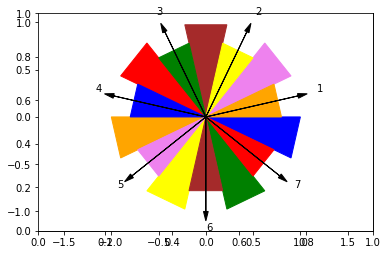

[ 0.  1.  0.  0.  0. -1.  0.]
0.9749279121818237


In [20]:
# We can work with higher number of phases as well...

m = 7;  # Number of phases
Q = 7; # Number of slots
p = 1;  # Number of pole pairs

sos = koil.star_of_slot(m, Q, p);
sos.create_sectors();
sos.plot()
w = koil.m_phase_winding() 
sos.populate_winding(w);

print(w.windings[0].get_slot_matrix())
print(w.windings[0].get_kw())